<a href="https://colab.research.google.com/github/haris-lutafullah/Research-Work/blob/main/Traffic_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Implementation of Traffic Prediction system using Resnet LSTM**</p>

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Data Loading**</p>

In [ ]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Pre-Processing Data**</p>

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df = df[['date_time', 'traffic_volume']].dropna()

In [ ]:
scaler = MinMaxScaler()
df['traffic_volume'] = scaler.fit_transform(df[['traffic_volume']])

In [ ]:
#creating Time Series Windoes for 24 i.e. per day
TIME_STEPS = 24
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 1])  # Traffic volume
        y.append(data[i + time_steps, 1])
    return np.array(X), np.array(y)

traffic_data = df.values
X, y = create_time_series(traffic_data, TIME_STEPS)

**Dividing Sample**

In [ ]:
# Split the data
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [ ]:
# Reshape X_train and X_test for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Ensure y_train and y_test are 2D (samples, 1) and are of type float32
y_train = np.array(y_train).reshape(-1, 1).astype(np.float32)
y_test = np.array(y_test).reshape(-1, 1).astype(np.float32)



#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Creating RESNET LSTM**</p>

In [ ]:
def resnet_block(input_layer, filters, kernel_size=3):
    x = Conv1D(filters=filters, kernel_size=kernel_size, padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(filters=filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    x = Add()([x, input_layer])
    x = Activation('relu')(x)
    return x

**Model Building**

In [ ]:
# Build ResNet-LSTM Model
def build_resnet_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = resnet_block(inputs, filters=64)
    x = resnet_block(x, filters=64)
    x = LSTM(50)(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    return model


**Model Compilation**

In [ ]:
# Compile the model
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_resnet_lstm_model(input_shape)
model.compile(optimizer='adam', loss='mse')


In [ ]:
# Ensure y_train and y_test are 2D (samples, 1) and are of type float32 or float64
y_train = np.array(y_train).reshape(-1, 1).astype(np.float32)
y_test = np.array(y_test).reshape(-1, 1).astype(np.float32)

# Explicitly cast X_train and X_test to float32 as well
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

**Model Fitting / Training**

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 2/100
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 3/100
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 4/100
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 5/100
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 6/100
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 7/100
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 8/100
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 9/100
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 10/100
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 11/100
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - loss: 0.0021 - val_loss: 0.00

**Predicting from the model**

In [ ]:
# Predict traffic on the test set
y_pred = model.predict(X_test)

302/302 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
# Rescale the predictions and actual values back to the original scale
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)



#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Evaluations**</p>

In [ ]:
# Calculate performance metrics
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
# Calculate percentage errors
mse_percentage = (mse / np.mean(y_test_rescaled)) * 100
mae_percentage = (mae / np.mean(y_test_rescaled)) * 100

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error Percentage: {mse_percentage:.2f}%")
print(f"Mean Absolute Error Percentage: {mae_percentage:.2f}%")

Mean Squared Error (MSE): 164464.34
Mean Absolute Error (MAE): 256.46
Mean Squared Error Percentage: 5051.39%
Mean Absolute Error Percentage: 7.88%


In [ ]:
# Display actual vs predicted values
predictions_df = pd.DataFrame({
    'Actual Traffic Volume': y_test_rescaled.flatten(),
    'Predicted Traffic Volume': y_pred_rescaled.flatten()
})

print("\nSample Predictions:")
print(predictions_df.head(10))  # Display first 10 predictions


Sample Predictions:
   Actual Traffic Volume  Predicted Traffic Volume
0            1713.000000               1664.909912
1            1068.000000               1556.241333
2             611.000000               1075.083618
3             362.000000                473.911194
4             254.000015                292.667328
5             254.000015                327.641022
6             383.000000                562.283508
7             383.000000                918.313843
8             820.000000               1073.252563
9             820.000000               1963.355347


**Plotting**

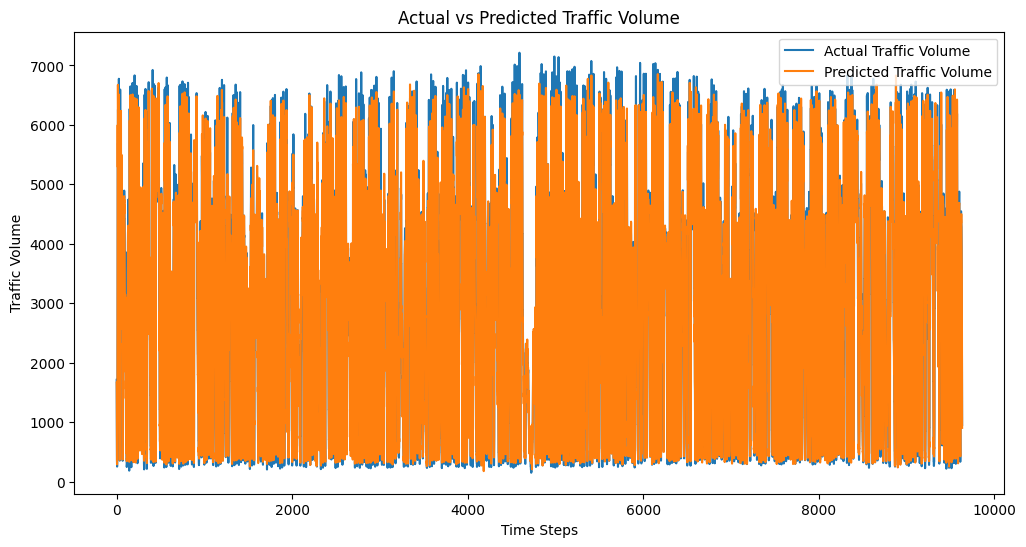

In [ ]:
# Plot actual vs predicted traffic volumes
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Traffic Volume')
plt.plot(y_pred_rescaled, label='Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Time Steps')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()



#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Pre-Processing for LB LSTM**</p>

In [ ]:
# Convert 'date_time' column to datetime
data['date_time'] = pd.to_datetime(data['date_time'])

# Features to normalize
features_to_normalize = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']


In [ ]:
# Initialize MinMaxScaler and normalize the features
scaler = MinMaxScaler()
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# Define the lookback period (e.g., 24 hours)
lookback = 24

In [ ]:
def create_sequences(data, lookback):
    sequences = []
    targets = []
    for i in range(len(data) - lookback):
        sequence = data[i:i + lookback]
        target = data[i + lookback][-1]  # Traffic volume is the last column
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [ ]:
# Prepare the features (excluding 'holiday', 'weather_main', 'weather_description', 'date_time')
features = data[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].values

# Generate sequences and targets
X, y = create_sequences(features, lookback)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)




#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Building LB LSTM**</p>

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(lookback, X.shape[2])))
model.add(Dense(1))  # Single output (traffic volume)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 2/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0037 - val_loss: 0.0029
Epoch 3/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 4/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0037 - val_loss: 0.0029
Epoch 5/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 6/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 7/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 8/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 9/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 10/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 11/100
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 12/100
603/603 

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
# Inverse scale the predictions and actual values to the original scale
y_test_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((len(y_test), 4)), y_test.reshape(-1, 1)], axis=1))[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.concatenate([np.zeros((len(y_pred), 4)), y_pred], axis=1))[:, -1]




#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Valiation for LB LSTM**</p>

In [ ]:
# Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

# Calculate errors as percentages
mse_percentage = (mse / np.mean(y_test_rescaled)) * 100
rmse_percentage = (rmse / np.mean(y_test_rescaled)) * 100
mae_percentage = (mae / np.mean(y_test_rescaled)) * 100

# Print evaluation metrics
print(f"MSE: {mse_percentage:.2f}%")
print(f"RMSE: {rmse_percentage:.2f}%")
print(f"MAE: {mae_percentage:.2f}%")

MSE: 5506.58%
RMSE: 13.01%
MAE: 8.65%


# Implementation using LSTM

In [ ]:
# Preprocess the data
# Assuming the target column is 'traffic_volume' and time feature is present (adjust according to actual columns)
data['date_time'] = pd.to_datetime(data['date_time'])
data.set_index('date_time', inplace=True)

# Selecting relevant columns
# Assume 'traffic_volume' is the target variable
traffic_volume = data[['traffic_volume']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(traffic_volume)

In [ ]:
# Prepare the data for LSTM (using last 60 timesteps to predict the next)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape the data for LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 49s 81ms/step - loss: 0.0053 - val_loss: 0.0028
Epoch 2/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 80s 79ms/step - loss: 0.0051 - val_loss: 0.0028
Epoch 3/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 48s 80ms/step - loss: 0.0052 - val_loss: 0.0028
Epoch 4/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - loss: 0.0052 - val_loss: 0.0027
Epoch 5/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - loss: 0.0051 - val_loss: 0.0027
Epoch 6/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 47s 78ms/step - loss: 0.0051 - val_loss: 0.0027
Epoch 7/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - loss: 0.0051 - val_loss: 0.0027
Epoch 8/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - loss: 0.0049 - val_loss: 0.0027
Epoch 9/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - loss: 0.0051 - val_loss: 0.0027
Epoch 10/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - loss: 0.0049 - val_loss: 0.0027
Epoch 11/100
602/602 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 12/100
602/60

In [ ]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1204/1204 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_test.flatten(), test_predict.flatten())
rmse = np.sqrt(mean_squared_error(y_test.flatten(), test_predict.flatten()))
mse = mean_squared_error(y_test.flatten(), test_predict.flatten())

# Calculate the percentage error (relative to the true values)
mae_percentage = (mae / np.mean(y_test.flatten())) * 100
rmse_percentage = (rmse / np.mean(y_test.flatten())) * 100
mse_percentage = (mse / np.mean(y_test.flatten())) * 100

print(f"MAE before tuning: {mae_percentage:.2f}%")
print(f"RMSE before tuning: {rmse_percentage:.2f}%")
print(f"MSE before tuning: {mse_percentage:.2f}%")

MAE before tuning: 7.59%
RMSE before tuning: 11.64%
MSE before tuning: 0.61%


In [ ]:
# Fine-tune the model (e.g., by changing hyperparameters)
model_tuned = Sequential()
model_tuned.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))
model_tuned.add(Dropout(0.3))
model_tuned.add(LSTM(units=100, return_sequences=False))
model_tuned.add(Dropout(0.3))
model_tuned.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the tuned model
model_tuned.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the tuned model
history_tuned = model_tuned.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


NameError: name 'model_tuned' is not defined

In [ ]:
# Make predictions with the tuned model
train_predict_tuned = model_tuned.predict(X_train)
test_predict_tuned = model_tuned.predict(X_test)

1204/1204 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step
301/301 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step


In [ ]:
 #Fine-tuning section (for comparison)
mae_tuned = mean_absolute_error(y_test.flatten(), test_predict_tuned.flatten())
rmse_tuned = np.sqrt(mean_squared_error(y_test.flatten(), test_predict_tuned.flatten()))
mse_tuned = mean_squared_error(y_test.flatten(), test_predict_tuned.flatten())

# Percentage errors after tuning
mae_tuned_percentage = (mae_tuned / np.mean(y_test.flatten())) * 100
rmse_tuned_percentage = (rmse_tuned / np.mean(y_test.flatten())) * 100
mse_tuned_percentage = (mse_tuned / np.mean(y_test.flatten())) * 100

print(f"MAE after tuning: {mae_tuned_percentage:.2f}%")
print(f"RMSE after tuning: {rmse_tuned_percentage:.2f}%")
print(f"MSE after tuning: {mse_tuned_percentage:.2f}%")

MAE after tuning: 8.56%
RMSE after tuning: 12.33%
MSE after tuning: 0.68%


# Implementation using ARIMA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [ ]:
# Convert 'date_time' to datetime and set as index
data['date_time'] = pd.to_datetime(data['date_time'])
data.set_index('date_time', inplace=True)


In [ ]:
# Use data from the most recent years for testing, and the rest for training
train_size = int(len(data) * 0.8)  # 80% train, 20% test
train, test = data['traffic_volume'][:train_size], data['traffic_volume'][train_size:]


In [ ]:
# Define the p, d, q ranges
p = range(0, 5)
d = range(0, 2)
q = range(0, 4)

# Create combinations of p, d, q values
pdq = list(itertools.product(p, d, q))

# Perform grid search to find the best (p, d, q) based on AIC
best_aic = float('inf')
best_order = None
best_model = None

for param in pdq:
    try:
        model = ARIMA(train, order=param)
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = param
            best_model = result
    except:
        continue

print(f"Best ARIMA parameters: {best_order}, AIC: {best_aic}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Best ARIMA parameters: (4, 0, 3), AIC: 617423.2814210581


In [ ]:
# Forecast using the best ARIMA model
predictions = best_model.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Calculate the error metrics
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predictions)

# Convert error metrics to percentages of the mean of actual traffic_volume
mean_actual = np.mean(test)
mse_percent = (mse / mean_actual) * 100
rmse_percent = (rmse / mean_actual) * 100
mae_percent = (mae / mean_actual) * 100

# Print the error metrics
print(f"MSE (Percentage): {mse_percent:.2f}%")
print(f"RMSE (Percentage): {rmse_percent:.2f}%")
print(f"MAE (Percentage): {mae_percent:.2f}%")

MSE (Percentage): 118905.40%
RMSE (Percentage): 60.44%
MAE (Percentage): 52.90%


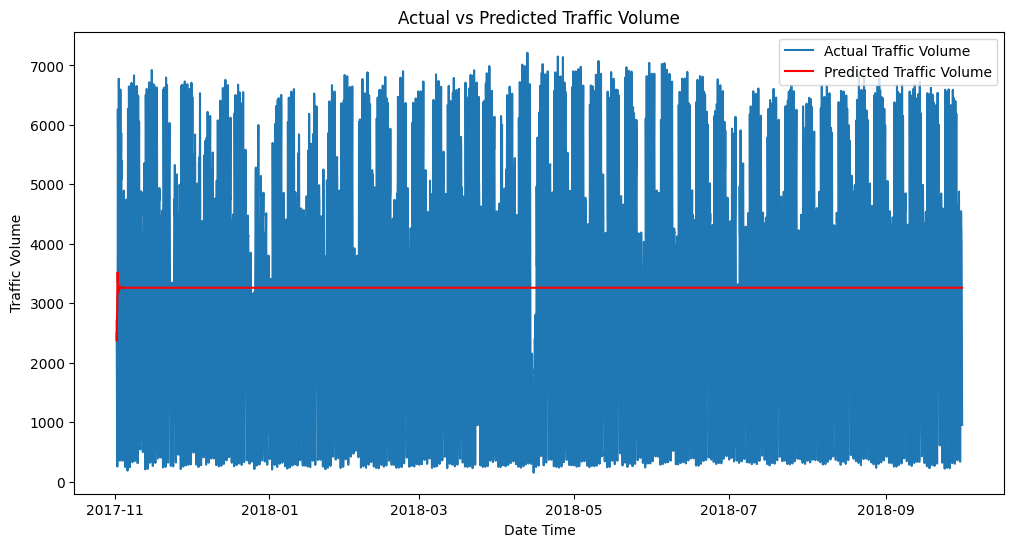

In [ ]:
# Plot actual vs predicted traffic volume
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual Traffic Volume')
plt.plot(test.index, predictions, label='Predicted Traffic Volume', color='red')
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()